In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
# Specify the directory where your JSON files are stored
directory_path = 'drive/MyDrive/VR Model Dataset/Alan'

# List to hold DataFrames
dataframes_list = []

# Loop through all json files in the specified directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(directory_path, file_name)
        # Read the JSON file and append the DataFrame to the list
        df = pd.read_json(file_path)
        for i in range(len(df)):
          df['ft_' + df['furnitureCounts'][i]['furnitureType']] = df['furnitureCounts'][i]['count']
        df.drop(columns=['furnitureCounts'], inplace=True)
        df.drop(df.index[1:], inplace=True)
        dataframes_list.append(df)

# Concatenate all DataFrames into one DataFrame
alan_good_df = pd.concat(dataframes_list, ignore_index=True)

In [ ]:
import os
import pandas as pd
# Specify the directory where your JSON files are stored
directory_path = 'drive/MyDrive/VR Model Dataset/Shawn'

# List to hold DataFrames
dataframes_list = []

# Loop through all json files in the specified directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(directory_path, file_name)
        # Read the JSON file and append the DataFrame to the list
        df = pd.read_json(file_path)
        for i in range(len(df)):
          df['ft_' + df['furnitureCounts'][i]['furnitureType']] = df['furnitureCounts'][i]['count']
        df.drop(columns=['furnitureCounts'], inplace=True)
        df.drop(df.index[1:], inplace=True)
        dataframes_list.append(df)

# Concatenate all DataFrames into one DataFrame
shawn_good_df = pd.concat(dataframes_list, ignore_index=True)

In [ ]:
len(shawn_good_df)

13

In [ ]:
alan_good_df['minDistance'] = 1
alan_good_df['result'] = 1
shawn_good_df['minDistance'] = 1
shawn_good_df['result'] = 1

In [ ]:
len(shawn_good_df)

13

In [ ]:
alan_bad_df = alan_good_df.copy(deep=True)
alan_bad_df['minDistance'] = 0
alan_bad_df['result'] = 0
shawn_bad_df = shawn_good_df.copy(deep=True)
shawn_bad_df['minDistance'] = 0
shawn_bad_df['result'] = 0

In [ ]:
len(shawn_bad_df)

13

In [ ]:
temp0 = shawn_good_df.copy(deep=True)
temp0['result'] = 0
alan_bad_df = pd.DataFrame()
alan_bad_df = pd.concat([alan_bad_df, temp0])

temp1 = alan_good_df.copy(deep=True)
temp1['result'] = 0
shawn_bad_df = pd.DataFrame()
shawn_bad_df = pd.concat([shawn_bad_df, temp1])

In [ ]:
len(shawn_bad_df)

10

In [ ]:
alan_df = pd.concat([alan_good_df, alan_bad_df])
alan_df.reset_index(drop=True, inplace=True)
shawn_df = pd.concat([shawn_good_df, shawn_bad_df])
shawn_df.reset_index(drop=True, inplace=True)
alan_df.fillna(0, inplace=True)
shawn_df.fillna(0, inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
shawn_df_scaled = scaler.fit_transform(shawn_df)

In [ ]:
# Initialize PCA and fit the scaled data
pca = PCA(n_components=2)  # Here, we reduce the dimensions to 2
principal_components = pca.fit_transform(shawn_df_scaled)

principal_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=shawn_df.columns)

# Find the most important feature for each principal component
most_important = {component: loadings[component].abs().idxmax() for component in loadings.columns}

# Print loadings
print("Principal Components Loadings:")
print(loadings)

# Print the most important feature for each principal component
print("\nMost Important Feature for each Principal Component:")
for component, feature in most_important.items():
    print(f"{component}: {feature} with loading of {loadings.loc[feature, component]}")

# Display the DataFrame with principal components
print("\nPrincipal Components:")
print(principal_df)

# Explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components Loadings:
                       PC1           PC2
minDistance       0.211643  7.071068e-01
averageDistance  -0.333946  5.551115e-17
totalObjects      0.467046 -8.326673e-17
totalColorRange  -0.450915  2.498002e-16
ft_sitting        0.299970 -2.498002e-16
ft_utility        0.407320 -3.469447e-16
ft_entertainment  0.348636 -2.775558e-16
result           -0.211643  7.071068e-01

Most Important Feature for each Principal Component:
PC1: totalObjects with loading of 0.46704601248035005
PC2: result with loading of 0.7071067811865477

Principal Components:
    Principal Component 1  Principal Component 2
0               -0.813207           1.472149e+00
1               -2.679309           1.472149e+00
2               -1.501815           1.472149e+00
3               -1.639706           1.472149e+00
4               -1.018727           1.472149e+00
5               -0.747501           1.472149e+00
6               -0.787205           1.472149e+00
7               -1.190362     

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

df = shawn_df.copy(deep=True)

X = df.iloc[:, :-1]
y = df['result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

coefficients = pd.DataFrame(lda.scalings_, index=df.columns[:-1], columns=['LD1'])
print("LDA Coefficients:")
print(coefficients)

# Identify the most important feature
most_important_feature = coefficients.abs().idxmax()[0]
most_important_value = coefficients.loc[most_important_feature, 'LD1']

print(f"\nThe most important feature is '{most_important_feature}' with a coefficient of {most_important_value}.")

LDA Coefficients:
                       LD1
minDistance       0.000000
averageDistance   0.137154
totalObjects     -1.062866
totalColorRange   5.587013
ft_sitting       -0.438520
ft_utility       -0.211379
ft_entertainment  0.320026

The most important feature is 'totalColorRange' with a coefficient of 5.587013205804278.


Summary Statistics by Class:
       minDistance                     averageDistance                      \
              mean  std median min max            mean       std    median   
result                                                                       
0              1.0  0.0    1.0   1   1        2.967421  0.402414  2.887981   
1              1.0  0.0    1.0   1   1        3.606274  0.446855  3.564097   

                            ... ft_utility                           \
             min       max  ...       mean       std median min max   
result                      ...                                       
0       2.320291  3.617386  ...   4.900000  1.449138    5.0   3   8   
1       2.658502  4.376476  ...   1.923077  0.493548    2.0   1   3   

       ft_entertainment                             
                   mean       std median  min  max  
result                                              
0              2.400000  0.516398    2.0  2.0  3.0  
1           

<Figure size 800x400 with 0 Axes>

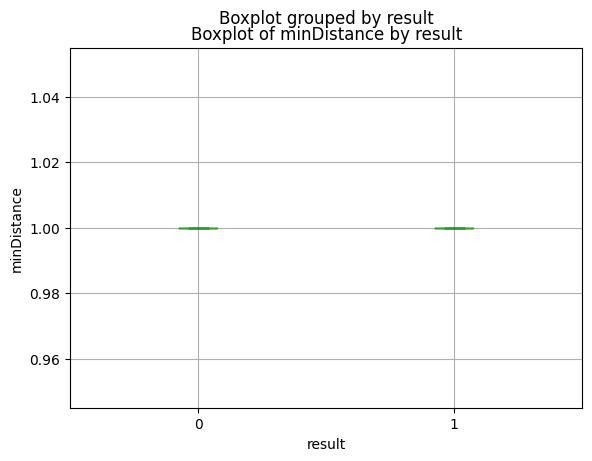

<Figure size 800x400 with 0 Axes>

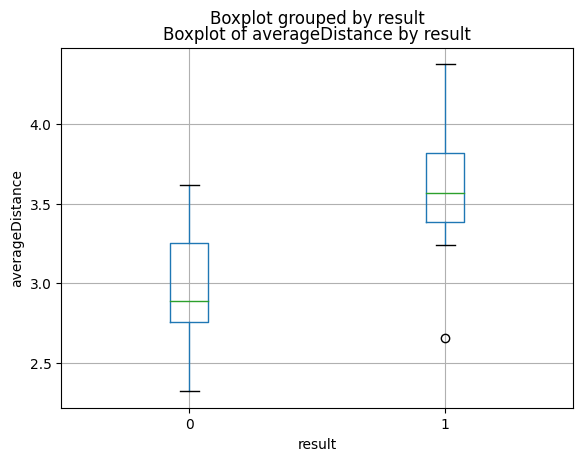

<Figure size 800x400 with 0 Axes>

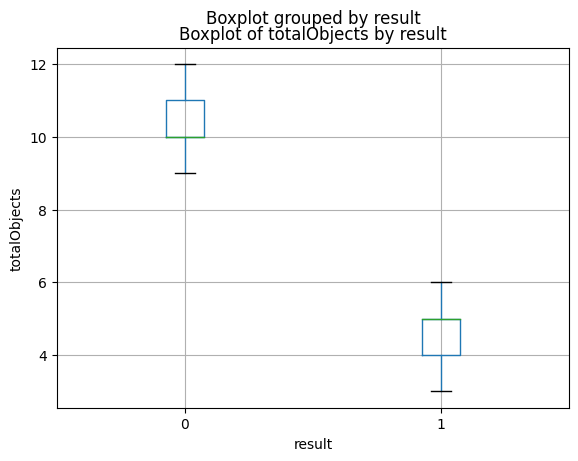

<Figure size 800x400 with 0 Axes>

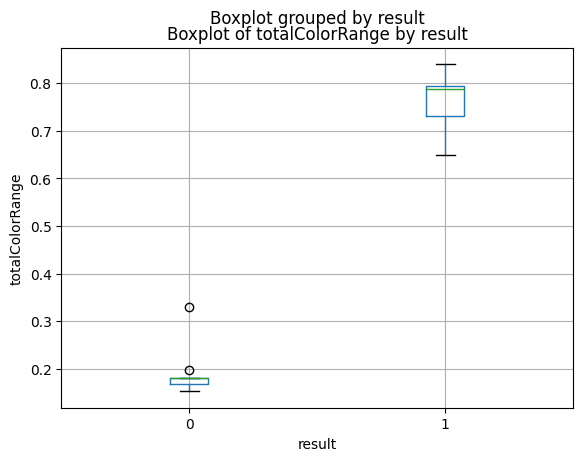

<Figure size 800x400 with 0 Axes>

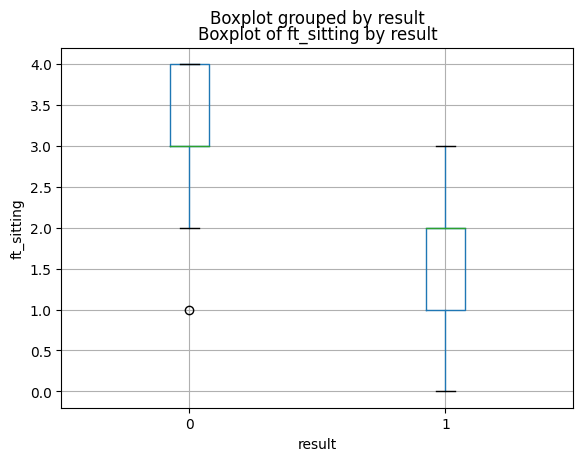

<Figure size 800x400 with 0 Axes>

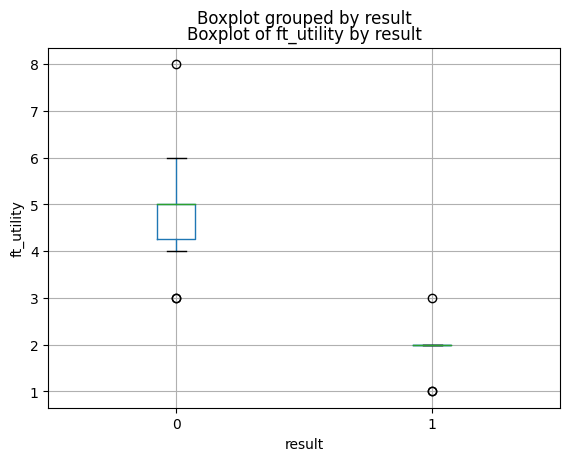

<Figure size 800x400 with 0 Axes>

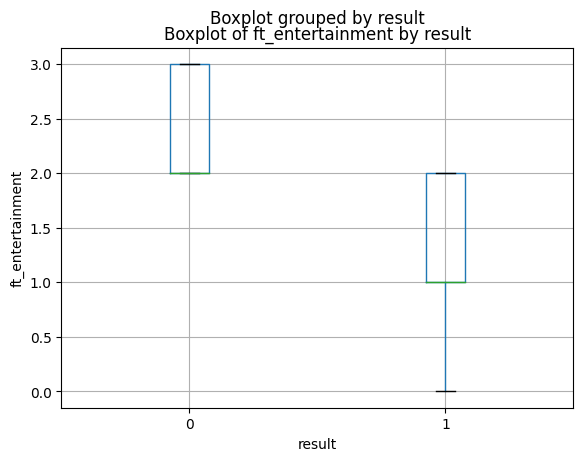

In [ ]:
import matplotlib.pyplot as plt
df = shawn_df.copy(deep=True)

# Summary statistics
grouped = df.groupby('result')
summary_statistics = grouped.agg(['mean', 'std', 'median', 'min', 'max'])
print("Summary Statistics by Class:")
print(summary_statistics)

# Visualize data
for column in df.columns[:-1]:  # Exclude the class label column
    plt.figure(figsize=(8, 4))
    df.boxplot(column=column, by='result')
    plt.title(f'Boxplot of {column} by result')
    plt.xlabel('result')
    plt.ylabel(column)
    plt.show()

In [ ]:
1import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

df = alan_df.copy(deep=True)
df.drop(columns=['minDistance'], inplace=True)
X = df.iloc[:, :-1]
y = df['result']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

coefficients = pd.DataFrame(lda.scalings_, index=df.columns[:-1], columns=['LD1'])
print("LDA Coefficients:")
print(coefficients)

# Identify the most important feature
most_important_feature = coefficients.abs().idxmax()[0]
most_important_value = coefficients.loc[most_important_feature, 'LD1']

print(f"\nThe most important feature is '{most_important_feature}' with a coefficient of {most_important_value}.")

LDA Coefficients:
                       LD1
minDistance       0.000000
averageDistance  -0.137154
totalObjects      1.062866
totalColorRange  -5.587013
ft_sitting        0.438520
ft_utility        0.211379
ft_entertainment -0.320026

The most important feature is 'totalColorRange' with a coefficient of -5.58701320580428.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=shawn_df.iloc[:,:7]
y=shawn_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf

shawn_model = tf.keras.Sequential()
shawn_model.add(tf.keras.layers.Dense(8, activation="relu", input_shape = (7,)))
shawn_model.add(tf.keras.layers.Dense(8, activation="relu"))
shawn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
shawn_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

shawn_model.fit(X_train, y_train,epochs=30, batch_size=2, verbose=1)

Epoch 1/30
12/12 [==============================] - 1s 11ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.7917
Epoch 3/30
12/12 [==============================] - 0s 7ms/step - loss: 0.5975 - accuracy: 0.7917
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5837 - accuracy: 0.8333
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.8333
Epoch 6/30
12/12 [==============================] - 0s 12ms/step - loss: 0.5540 - accuracy: 0.8333
Epoch 7/30
12/12 [==============================] - 0s 13ms/step - loss: 0.5374 - accuracy: 0.8333
Epoch 8/30
12/12 [==============================] - 0s 13ms/step - loss: 0.5211 - accuracy: 0.8333
Epoch 9/30
12/12 [==============================] - 0s 18ms/step - loss: 0.5055 - accuracy: 0.8750
Epoch 10/30
12/12 [==============================] - 0s 12ms/step - loss: 0.4895 - accuracy: 0.8750
Epoch 11/30
1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=alan_df.iloc[:,:7]
y=alan_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf

alan_model = tf.keras.Sequential()
alan_model.add(tf.keras.layers.Dense(8, activation="relu", input_shape = (7,)))
alan_model.add(tf.keras.layers.Dense(8, activation="relu"))
alan_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
alan_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

alan_model.fit(X_train, y_train,epochs=30, batch_size=2, verbose=1)

Epoch 1/30
11/11 [==============================] - 1s 5ms/step - loss: 0.7401 - accuracy: 0.4545
Epoch 2/30
11/11 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.5455
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.5909
Epoch 4/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.7273
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.7273
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6818
Epoch 7/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.7273
Epoch 8/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.7727
Epoch 9/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.8182
Epoch 10/30
11/11 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.8182
Epoch 11/30
11/11 [

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=shawn_df.iloc[:,1:7]
y=shawn_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf

shawn_model_no_tv = tf.keras.Sequential()
shawn_model_no_tv.add(tf.keras.layers.Dense(8, activation="relu", input_shape = (6,)))
shawn_model_no_tv.add(tf.keras.layers.Dense(8, activation="relu"))
shawn_model_no_tv.add(tf.keras.layers.Dense(1, activation="sigmoid"))
shawn_model_no_tv.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

shawn_model_no_tv.fit(X_train, y_train,epochs=100, batch_size=2, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.5848 - accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.9333
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.9333
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.9333
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 1.0000
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 1.0000
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 1.0000
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 1.0000
Epoch 11/100
8/8 [===========

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=alan_df.iloc[:,1:7]
y=alan_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf

alan_model_no_tv = tf.keras.Sequential()
alan_model_no_tv.add(tf.keras.layers.Dense(8, activation="relu", input_shape = (6,)))
alan_model_no_tv.add(tf.keras.layers.Dense(8, activation="relu"))
alan_model_no_tv.add(tf.keras.layers.Dense(1, activation="sigmoid"))
alan_model_no_tv.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

alan_model_no_tv.fit(X_train, y_train,epochs=100, batch_size=2, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6596 - accuracy: 0.4000
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6026 - accuracy: 0.4000
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.7333
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8000
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8000
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.9333
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.9333
Epoch 11/100
8/8 [===========

In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tf2onnx, onnx
onnx_model, _ = tf2onnx.convert.from_keras(alan_model_no_tv, opset=13)
onnx.save(onnx_model, "drive/MyDrive/VR Model Dataset/Alan/alan_model_no_tv.onnx")

In [ ]:
import tf2onnx, onnx
onnx_model, _ = tf2onnx.convert.from_keras(shawn_model_no_tv, opset=13)
onnx.save(onnx_model, "drive/MyDrive/VR Model Dataset/Shawn/shawn_model_no_tv.onnx")